In [1]:
# Importando Bibliotecas Essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [2]:
# Se conectando com os dados - Nesse caso, a Fonte de Dados é um Arquivo
dataset = pd.read_csv('/content/risco.csv')

In [3]:
# Imprime na Tela os primeiros registros
dataset.head()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


In [4]:
# Informações do Dataset - Tipo das Variáveis, Quantidade de linhas (registros) e colunas (variáveis/features)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#Estatísticas descritivas das variáveis numéricas
dataset.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Tabela de Frequência da Variável "risco" - Nossa Classe ou Label ou Target
dataset['Risco'].value_counts()


Risco_Alto     50
Risco_Medio    50
Risco_Baixo    50
Name: Risco, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


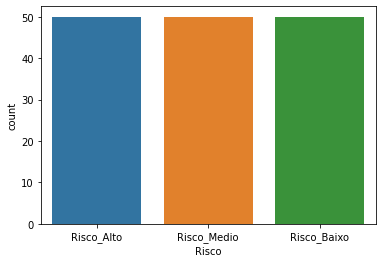

In [ ]:
# Cria um gráfico de barras da variável Target
sns.countplot(dataset['Risco'])

In [9]:
# Valores ausentes
dataset.isnull().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

In [10]:
#Eliminar a coluna de identificação, pois ela não é variável explicativa, é somente a identificação do cliente7
dataset = dataset.drop(columns='id_cliente')

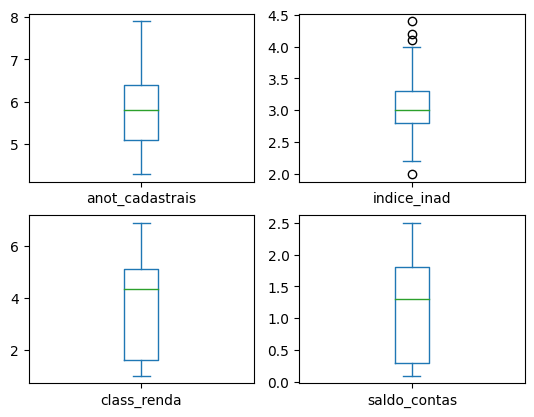

In [11]:
# Cria um gráfico boxplot
from matplotlib import pyplot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

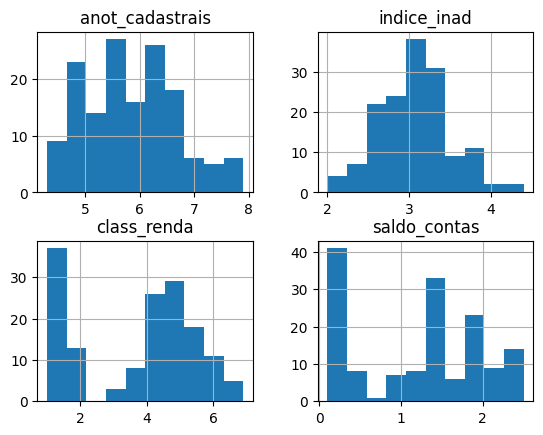

In [12]:
#cria um gráfico conhecido como histohrama
dataset.hist()
plt.show()


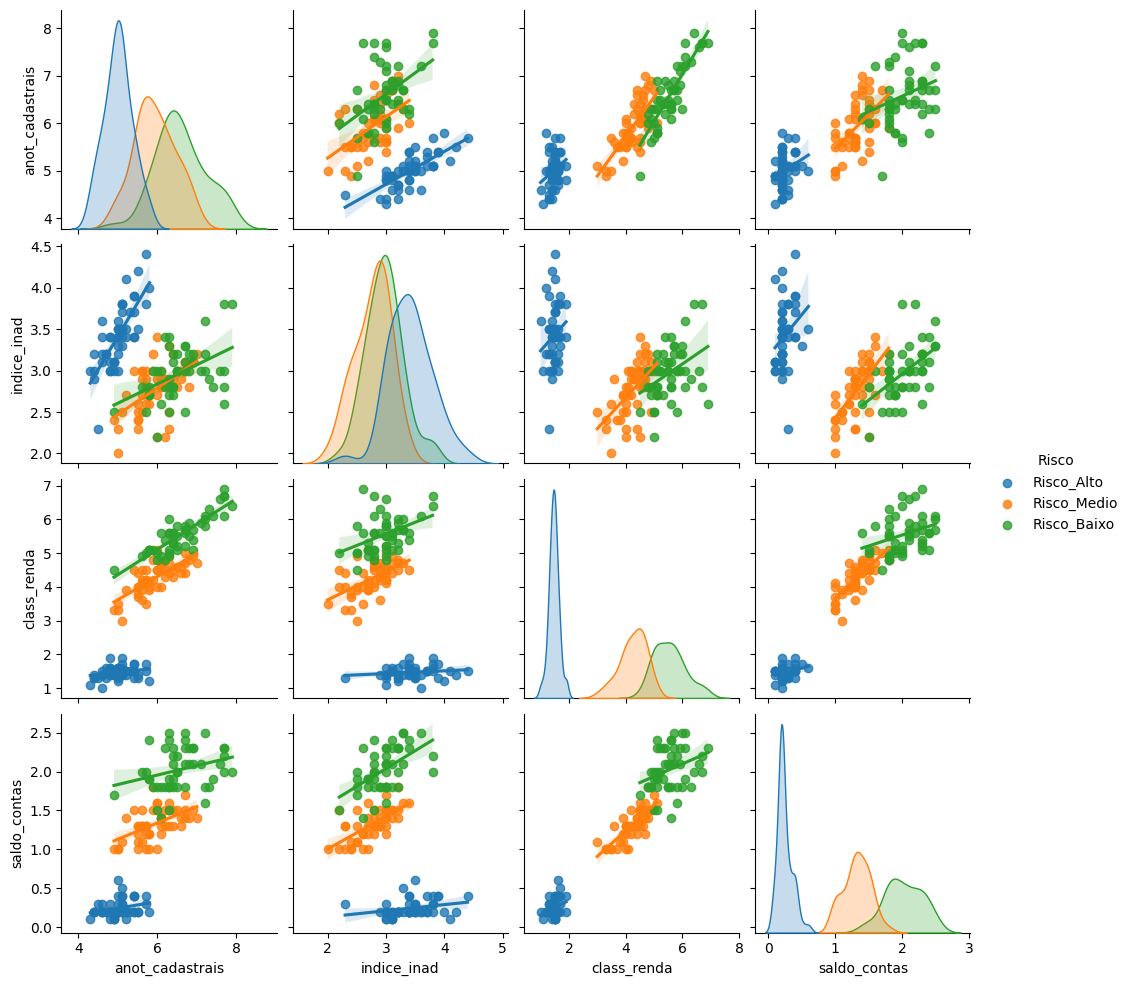

In [13]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
sns.pairplot(dataset, hue='Risco', kind="reg") # kind=reg é a reta de regressão

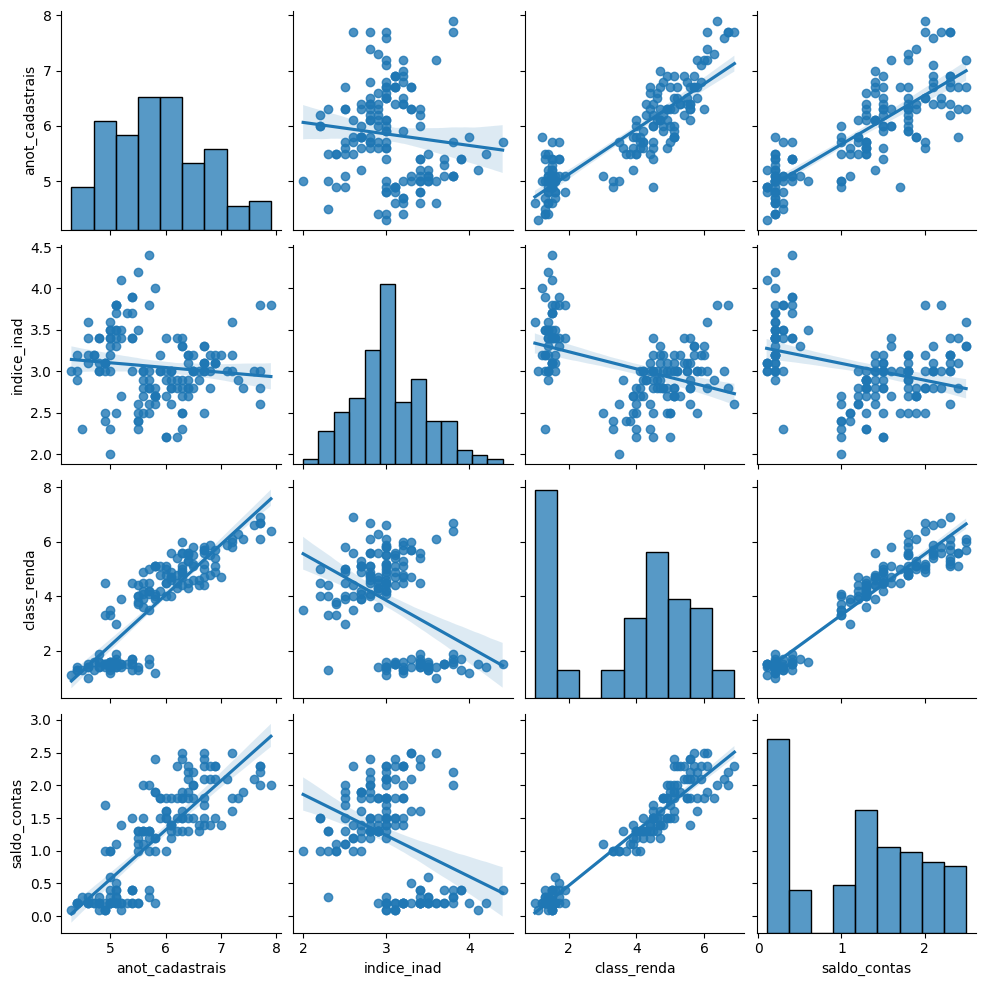

In [14]:
# Criação do Gráfico de dispersão sem agregar pelo TARGET
sns.pairplot(dataset,kind="reg")

# 3° Pré-Processamento dos Dados

In [15]:
#3 Separando as Variáveis de Entrada e Saída do Modelo
X = dataset.iloc[:,:-1].values  #variáveis independentes
y = dataset.iloc[:,-1].values  #Target/labe/class/vairável dependente

In [16]:
#Print das variáveis X e Y
print("\nVariáveis de Entrada da avaliação:\n\n", X[:3])
print("\nRisco - Variável a ser Predita :\n\n", y[:3])


Variáveis de Entrada da avaliação:

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Risco - Variável a ser Predita :

 ['Risco_Alto' 'Risco_Alto' 'Risco_Alto']


### Separando os dados entre Treino e Teste

In [17]:
#Divide o dataset em Train and Test
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state = 7)

In [18]:
print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

Dados de Treino :
----------------

X = 
 [[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1. ]]
y = 
 ['Risco_Baixo' 'Risco_Medio']


Dados de Teste :
----------------

X = 
 [[5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]]
y = 
 ['Risco_Baixo' 'Risco_Medio']


In [19]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (120, 4)
Shape dos dados de teste é (30, 4)


### Padronizando as Features - As variáveis explicativas (variáveis de entrada)


In [20]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[ 0.43325894 -0.59653573  0.62601116  0.82081788]
 [-0.15754871 -1.05688485 -0.09737951 -0.21464226]
 [-1.45732553  1.24486074 -1.48851543 -1.2501024 ]
 [ 1.26038965  0.09398794  0.95988378  1.20911544]
 [ 0.669582   -0.36636117  0.34778398  0.17365529]]
-------------------------

X_test :
 [[ 0.07877435 -0.13618661  0.79294747  0.82081788]
 [-0.51203329 -0.13618661  0.45907485  0.43252033]
 [-0.98467941  1.01468618 -1.32157912 -1.12066988]
 [-0.27571024 -0.13618661  0.45907485  0.43252033]
 [-1.10284094 -1.28705941  0.45907485  0.69138537]]


# <font color='Black'> **Aula 2 - Construíndo Máquinas Preditivas** </font>

# 4° Construindo a Máquina Preditiva

### 1° Versão da Máquina Preditiva: Criando um **baseline**

Aqui nós vamos criar a primeira versão da Máquina Preditiva. Depois, vamos buscar formas de melhorar a assertividade do modelo.

In [21]:
# Importando a Biblioteca KNN
from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30) #[1,10,30,50]



In [22]:
#Treinando a Máquina preditiva com os dados de treino
Maquina_Preditiva = Maquina_Preditiva.fit(X_train,y_train)



In [23]:
#Fazendo novas Previsões com os dados de teste
y_pred = Maquina_Preditiva.predict(X_test)


print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)


---------------------------

Valores Reais com dados de teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Valores Preditos com a Máquina Preditiva com dados de Teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Medio'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [24]:
#Função que mostra os hyperparâmetros utilizados na construção da Máquina Preditiva
Maquina_Preditiva.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=30)>

#5° Avaliando a Máquina Preditiva

In [25]:
# Calculando a Acurácia
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)

Acurácia da Máquina =  80.0


In [26]:
# Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred})

error_df.head(5)


Real vs Predito 
------------------------------



,Real,Predito
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Medio


In [27]:
#Usando a confusion matrix  e o classification report para avaliar a acurácia e demais indicadores
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

Acurácia da Máquina =  80.0
[[7 0 0]
 [0 8 3]
 [0 3 9]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.73      0.73      0.73        11
 Risco_Medio       0.75      0.75      0.75        12

    accuracy                           0.80        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.80      0.80      0.80        30



### 2° Versão da Máquina Preditiva: Máquina Definitiva

In [28]:
# Importando a Biblioteca do SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=7)




In [29]:
#Treinando a Máquina com o SVC
classifier.fit(X_train,y_train)



SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

In [30]:
#Fazendo novas previsões com os dados de teste
y_pred = classifier.predict(X_test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",y_pred)
print("\n---------------------------\n")
print("Actual Values for Test Set :\n",y_test)


---------------------------

Predicted Values for Test Set :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Actual Values for Test Set :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [31]:
#Imprimindo os hyperparâmetros utilizados na criação da Maquina Preditiva Definitiva
classifier

SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

In [32]:
# Calculando a Acurácia da Máquina Preditiva
from sklearn import metrics
print("Prediction Accuracy = ", metrics.accuracy_score(y_test, y_pred))

# Comparando valores Reais com Preditos pela Máquina
print("\nActual vs Predicted  \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df.head(5)

Prediction Accuracy =  0.9333333333333333

Actual vs Predicted  
------------------------------



,Actual,Predicted
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Baixo


In [33]:

#Usando a confusion matrix e o classification report para avaliar a Máquina
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)

In [34]:
# Imprimindo a Confusion Matrix e o Classification Report
print(cm)
print(cr)

[[ 7  0  0]
 [ 0 11  0]
 [ 0  2 10]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.85      1.00      0.92        11
 Risco_Medio       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

